In [1]:
from unitraj import *
from unitraj.utils.console import Console

cfg = ExperimentConfig(
    is_debug=False,
    datamodule=LitDatamoduleConfig(
        dataset_config=DatasetConfig(
            # parser=DataParserConfig(
            #     num_debug_samples=1024,
            #     take_debug_samples_front=True
            # ),
        ),
        batch_size=1,
    ),
)

_, _, datamodule = cfg.setup_target()

Cannot import knn_cuda for MTR. Please check the cuda compilation.
Cannot import attention_cuda for MTR. Please check the cuda compilation.
Cannot import attention_cuda for MTR. Please check the cuda compilation.


Setting float32 matmul precision to 'medium' for precision='32-true'.

[ExperimentConfig::_set_seed]: Setting random seed to 42 (np, torch, cuda, random, pl)

Seed set to 42


[ExperimentConfig::setup_target]: Instantiating lightning components...

/home/duchscherer/miniconda3/envs/unitraj/lib/python3.9/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


[LitTrainerFactory::create_trainer]: Configuring logger...

[LitTrainerFactory::create_trainer]: Configuring callbacks...

[LitTrainerFactory::_configure_callbacks]: ModelCheckpoint configured: monitor='val/brier_fde', 
dir='/home/duchscherer/repos/Video-Analysis/.logs/checkpoints/default_exp', filename='{epoch:02d}-{val/brier_fde:.2f}'

[LitTrainerFactory::_configure_callbacks]: LearningRateMonitor configured: interval='epoch'

Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [2]:
datamodule.setup("fit")

[DataParserConfig::setup_target::TRAIN]: Using 32/32 workers
Rebuild dataset: False

[DataParser::load_data::TRAIN]: Metadata found for train, skipping rebuild.

[LitDatamodule::setup]: Setup dataset for stage: train

In [3]:
# Get a single batch (collated item) from the dataloader
batch = next(iter(datamodule.train_dataloader()))["input_dict"]

# Print the keys and shapes if it's a dictionary
if isinstance(batch, dict):
    print("Batch is a dictionary with keys:")
    for key, value in batch.items():
        if hasattr(value, 'shape'):
            print(f"  {key}: {type(value)} with shape {value.shape}")
        else:
            print(f"  {key}: {type(value)}")
elif isinstance(batch, (list, tuple)):
    print("Batch is a list/tuple with items:")
    for i, item in enumerate(batch):
        if hasattr(item, 'shape'):
            print(f"  Item {i}: {type(item)} with shape {item.shape}")
        else:
            print(f"  Item {i}: {type(item)}")
else:
    print(f"Batch is of type: {type(batch)}")

[LitDatamodule::train_dataloader]: Creating training DataLoader: batch_size=1, workers=32, shuffle=True

Batch is a dictionary with keys:
  scenario_id: <class 'list'>
  obj_trajs: <class 'torch.Tensor'> with shape torch.Size([1, 64, 21, 39])
  obj_trajs_mask: <class 'torch.Tensor'> with shape torch.Size([1, 64, 21])
  track_index_to_predict: <class 'torch.Tensor'> with shape torch.Size([1])
  obj_trajs_pos: <class 'torch.Tensor'> with shape torch.Size([1, 64, 21, 3])
  obj_trajs_last_pos: <class 'torch.Tensor'> with shape torch.Size([1, 64, 3])
  center_objects_world: <class 'torch.Tensor'> with shape torch.Size([1, 10])
  center_objects_id: <class 'list'>
  center_objects_type: <class 'numpy.ndarray'> with shape (1,)
  map_center: <class 'torch.Tensor'> with shape torch.Size([1, 3])
  obj_trajs_future_state: <class 'torch.Tensor'> with shape torch.Size([1, 64, 60, 4])
  obj_trajs_future_mask: <class 'torch.Tensor'> with shape torch.Size([1, 64, 60])
  center_gt_trajs: <class 'torch.Tensor'> with shape torch.Size([1, 60, 4])
  center_gt_trajs_mask: <class 'torch.Tensor'> with shape torch

In [4]:
datamodule.train_dataset.data_samples.head()

,h5_path,scenario_id,kalman_difficulty,num_agents,num_agents_interest,scenario_future_duration,num_map_polylines,track_index_to_predict,center_objects_type,dataset_name,trajectory_type
group_name,,,,,,,,,,,
av2_scenarionet-0-0-0,/work/share/traj-pred-data/av2_sn_processed/av...,sd_av2_v2_1d2bc312-645b-411c-beb0-46b49e1890fb...,"[[2.9746385, 7.591374, -1.0], [5.772799, 13.58...",15,4,60,256,0,1,av2,1
av2_scenarionet-0-0-1,/work/share/traj-pred-data/av2_sn_processed/av...,sd_av2_v2_1d2bc312-645b-411c-beb0-46b49e1890fb...,"[[2.9746385, 7.591374, -1.0], [5.772799, 13.58...",15,4,60,256,0,1,av2,1
av2_scenarionet-0-0-2,/work/share/traj-pred-data/av2_sn_processed/av...,sd_av2_v2_1d2bc312-645b-411c-beb0-46b49e1890fb...,"[[2.9746385, 7.591374, -1.0], [5.772799, 13.58...",15,4,60,256,0,1,av2,0
av2_scenarionet-0-0-3,/work/share/traj-pred-data/av2_sn_processed/av...,sd_av2_v2_1d2bc312-645b-411c-beb0-46b49e1890fb...,"[[2.9746385, 7.591374, -1.0], [5.772799, 13.58...",15,4,60,256,0,1,av2,0
av2_scenarionet-0-2-0,/work/share/traj-pred-data/av2_sn_processed/av...,sd_av2_v2_0be2aa5c-c4ae-4f06-a643-db41aec55d89...,"[[1.2986916, 2.535061, -1.0], [0.5374408, 1.91...",22,4,60,256,0,1,av2,1


In [5]:
datamodule.train_dataset[0].print_shapes()

--- Shapes for DatasetItem (1d2bc312-645b-411c-beb0-46b49e1890fb) ---
scenario_id: <class 'str'>
obj_trajs: (64, 21, 39)
obj_trajs_mask: (64, 21)
track_index_to_predict: <class 'numpy.int64'>
obj_trajs_pos: (64, 21, 3)
obj_trajs_last_pos: (64, 3)
center_objects_world: (10,)
center_objects_id: <class 'str'>
center_objects_type: <class 'numpy.int64'>
map_center: (3,)
obj_trajs_future_state: (64, 60, 4)
obj_trajs_future_mask: (64, 60)
center_gt_trajs: (60, 4)
center_gt_trajs_mask: (60,)
center_gt_final_valid_idx: <class 'float'>
center_gt_trajs_src: (81, 10)
map_polylines: (256, 20, 29)
map_polylines_mask: (256, 20)
map_polylines_center: (256, 3)
dataset_name: <class 'str'>
kalman_difficulty: (3,)
trajectory_type: <class 'int'>
-------------------------------------------------


In [7]:
datamodule.train_dataset[0].summary()

"<DatasetItem '1d2bc312-645b-411c-beb0-46b49e1890fb' @ 'av2': Agents=15/64, Traj(P=21, F=60, D_past=39, D_future=4), Map(R=256, L=20, D_map=29), kd=(3,), traj_type=1>"

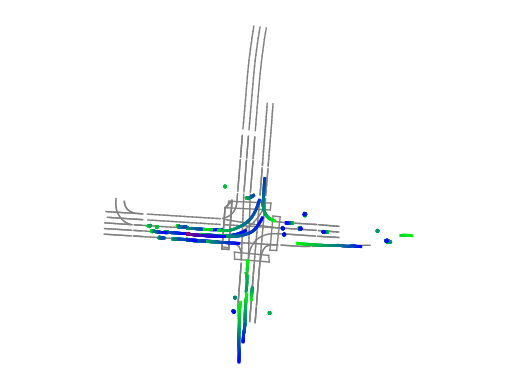

In [8]:
from matplotlib import pyplot as plt
from unitraj.utils.visualization import check_loaded_data, plot_dataset_item

check_loaded_data(datamodule.train_dataset[64])
plt.show()

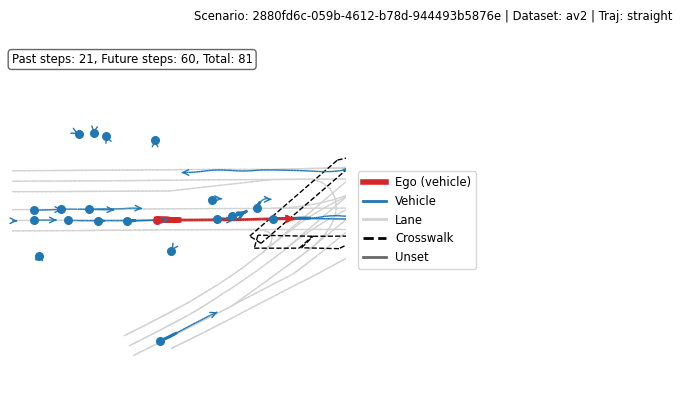

In [10]:
import numpy as np

rnd_sample = datamodule.train_dataset[np.random.randint(0, len(datamodule.train_dataset))]
plot_dataset_item(rnd_sample, include_agents_in_range=True, show_timestep_info=True)
plt.show()